# 上机实验一：基于前馈神经网络的分类任务设计

任务要求：设计一个前馈神经网络，对一组数据实现分类任务。

下载“dataset.csv”数据集，其中包含四类二维高斯数据和它们的标签。设计至少含有一层隐藏层的前馈神经网络来预测二维高斯样本所属的分类。这个数据集需要先进行随机排序，然后选取90%用于训练，剩下的10%用于测试。

注意事项：
1. 深度学习框架任选。
2. 鼓励尝试不同的网络层数、不同的神经元个数、使用不同的激活函数等，观察网络性能。
3. 实验报告需包含神经网络架构、每一轮mini-batch训练后的模型在训练集和测试集上的损失、最终的训练集和测试集准确率，以及对应的实验分析。
4. 将代码和实验报告打包成ZIP压缩包，以“姓名-学号-实验报告#”命名，比如“张三-2020XXX-实验报告一.zip”，提交到学习通（https://i.chaoxing.com/）。
5. 截止时间为12月20号下午2:00。

In [1]:
EPOCHS=200

In [2]:
import pandas as pd
df=pd.read_csv('dataset/dataset.csv')
df.head()


,data1,data2,label
0,-0.512041,-0.319361,1
1,1.063608,0.267168,1
2,0.028772,0.937264,1
3,-0.135077,-0.314189,1
4,1.025674,0.163771,1


In [3]:
import numpy as np
from sklearn.model_selection import train_test_split


# 假设你的dataframe名为df
df['data'] = df.apply(lambda row: np.array([float(row['data1']), float(row['data2'])]), axis=1)
# df.head()
x=list(df['data'].values)
y=list(df['label'].values)
x_train,x_test,y_train,y_test=train_test_split(np.array(x),np.array(y)-1,test_size=0.1,random_state=42)
x_train,x_val,y_train,y_val=train_test_split(x_train,y_train,test_size=0.1,random_state=2024)

model

In [270]:
import keras
model=keras.Sequential()
model.add(keras.Input(shape=(2,)))
model.add(keras.layers.Dense(16,activation='tanh'))
model.add(keras.layers.Dense(16,activation='tanh'))
model.add(keras.layers.Dense(16,activation='tanh'))
model.add(keras.layers.Dense(4,activation='softmax'))
# model.summary()
model.compile(optimizer='sgd',loss='sparse_categorical_crossentropy',metrics='accuracy')
history = model.fit(x_train, y_train, epochs=EPOCHS,batch_size=64, validation_data=(x_val, y_val))


Epoch 1/200
51/51 [==============================] - 0s 3ms/step - loss: 1.5429 - accuracy: 0.1398 - val_loss: 1.2861 - val_accuracy: 0.3528
Epoch 2/200
51/51 [==============================] - 0s 1ms/step - loss: 1.1446 - accuracy: 0.5404 - val_loss: 1.0337 - val_accuracy: 0.6250
Epoch 3/200
51/51 [==============================] - 0s 1ms/step - loss: 0.9446 - accuracy: 0.7904 - val_loss: 0.8909 - val_accuracy: 0.8056
Epoch 4/200
51/51 [==============================] - 0s 1ms/step - loss: 0.8247 - accuracy: 0.8383 - val_loss: 0.7965 - val_accuracy: 0.8167
Epoch 5/200
51/51 [==============================] - 0s 2ms/step - loss: 0.7414 - accuracy: 0.8485 - val_loss: 0.7255 - val_accuracy: 0.8250
Epoch 6/200
51/51 [==============================] - 0s 2ms/step - loss: 0.6767 - accuracy: 0.8627 - val_loss: 0.6675 - val_accuracy: 0.8472
Epoch 7/200
51/51 [==============================] - 0s 2ms/step - loss: 0.6229 - accuracy: 0.8694 - val_loss: 0.6178 - val_accuracy: 0.8583
Epoch 8/200
5

train

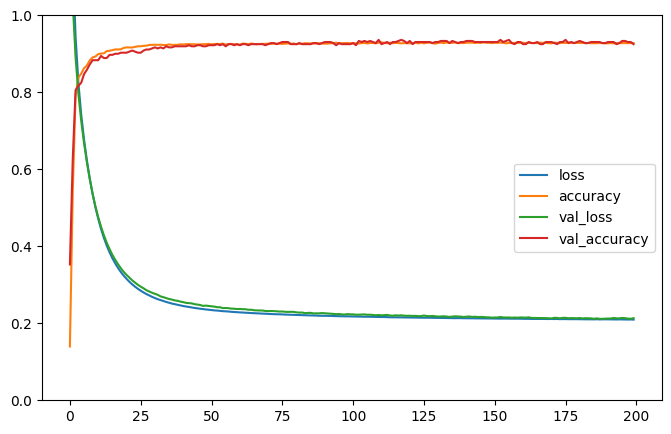

In [271]:
import pandas as pd
import matplotlib.pyplot as plt

# print(history.history)
pd.DataFrame(history.history).plot(figsize=(8, 5))
plt.grid(False)
# 'gca'代表Get Current Axis
plt.gca().set_ylim(0, 1) 
plt.savefig('imgs/d_64_tanh.png')


test

In [272]:
from sklearn.metrics import classification_report

predictions=model.predict(x_test,batch_size=1)
print(classification_report(y_test,predictions.argmax(axis=-1),target_names=['1','2','3','4']))

  1/400 [..............................] - ETA: 17s

400/400 [==============================] - 0s 769us/step
              precision    recall  f1-score   support

           1       0.88      0.79      0.83       107
           2       0.93      0.97      0.95        99
           3       0.98      0.96      0.97        95
           4       0.87      0.94      0.90        99

    accuracy                           0.91       400
   macro avg       0.91      0.92      0.91       400
weighted avg       0.91      0.91      0.91       400



另外的画图方法

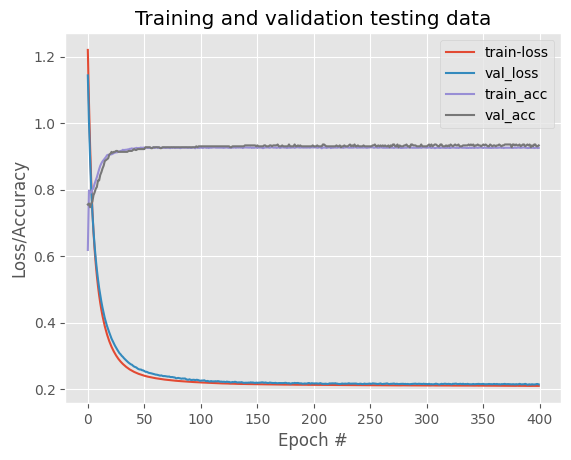

In [8]:
N=np.arange(0,400)
plt.style.use('ggplot')
plt.figure()
plt.plot(N,history.history['loss'],label='train-loss')
plt.plot(N,history.history['val_loss'],label='val_loss')
plt.plot(N,history.history['accuracy'],label='train_acc')
plt.plot(N,history.history['val_accuracy'],label='val_acc')
plt.title('Training and validation testing data')
plt.xlabel('Epoch #')
plt.ylabel('Loss/Accuracy')
plt.legend()
plt.savefig('metrics.png')